我们以kaggle房价预测竞赛为例Kaggle
(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques 利用线性回归，搭建一套挖安正的机器学习建模流程。   
1. 加载数据&分析
2. 数据处理
3. 特征工程
4. 数据划分（train/valid/test）
5. 模型训练
6. 模型评估


In [4]:
!ls . #加载home下的文件名


'3. 数据处理与可视化.ipynb'  'Python模块与类 .ipynb'
 感知机.ipynb		      Python-数据结构与基础语法.ipynb
 机器学习建模流程.ipynb       scikit-learn调用+决策树原理.ipynb
 统计分析与pandas.ipynb      'sklearn 入门---sklearn.tree 决策树.ipynb'
 线性代数与numpy.ipynb	      test
 学习记忆重点总结.ipynb       test.csv
 HousePrice		      test_exc.xlsx
 K临近算法（KNN）.ipynb       test.txt
 K-Means.ipynb		      Titanic
 module_test		      Tree.dot
 Python函数与高级特性.ipynb


In [12]:
!ls ./HousePrice

data_description.txt  sample_submission.csv  test.csv  train.csv


In [1]:
import pandas as pd

In [181]:
train = pd.read_csv(r'HousePrice/train.csv')
test = pd.read_csv(r'HousePrice/test.csv')
sample_submission = pd.read_csv(r'HousePrice/sample_submission.csv')

In [182]:
train.shape#81列，1460行


(1460, 81)

In [183]:
test.shape#80列，1459行,无salesprice

(1459, 80)

In [184]:
sample_submassion.shape

(1459, 2)

In [185]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [186]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [188]:
target = train.SalePrice.values #array
test_ids = test.Id.values #array

train.drop(['SalePrice','Id'],axis = 1,inplace=True)#
test.drop(['Id'],axis = 1,inplace=True)

In [189]:
num_train = len(train)#训练集sample个数
num_train

1460

In [190]:
data = pd.concat([train,test],axis = 0).reset_index(drop=True)

In [191]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [192]:
data.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

<AxesSubplot:>

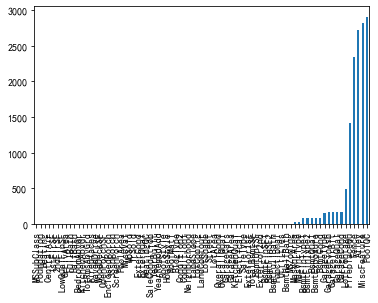

In [193]:
data.isnull().sum().sort_values().plot(kind='bar') #查看空值分布

In [194]:
data.isnull().mean()#计算各个特征的空值率，index就是特征名称而不是数字
data.isnull().mean()[data.isnull().mean()> 0.8].index.tolist() 
#提取出空值率大于0.8的特征名称:从样本中按照空值率切片，再对切片后的数据筛选（两步）
#切片+筛选：data.xxx.xxx[data.xxx.xxx >'筛选条件']

data.drop(data.isnull().mean()[data.isnull().mean() > 0.8].index.tolist(), axis = 1,inplace = True)
#drop 的用法 df.drop(传入一个待删除特征的index列表， axis = 1,inplace = True)

In [195]:
#\处于行尾是续行符
data.loc[:,data.dtypes[data.dtypes != 'object'].index] = \
data.loc[:,data.dtypes[data.dtypes != 'object'].index].fillna(
    data.loc[:,data.dtypes[data.dtypes != 'object'].index].median())

In [196]:
data.loc[:,data.dtypes[data.dtypes == 'object'].index] = \
data.loc[:,data.dtypes[data.dtypes == 'object'].index].fillna('Null')

In [197]:
data.isnull().sum().sum() #消灭空值

0

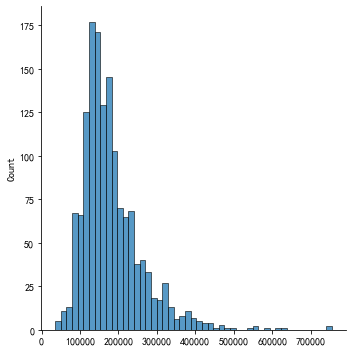

In [198]:
import seaborn as sns
import numpy as np
sns.displot(target)

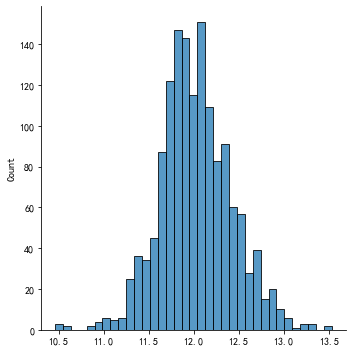

In [199]:
sns.displot(np.log1p(target))
#数据平滑处理 -- log1p( ) 和 exmp1( )
#1.  数据预处理时首先可以对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布，此步处理可能会使我们后续的分类结果得到一个好的结果。
#2. 平滑问题很容易处理掉，导致模型的结果达不到一定的标准，log1p( )能够避免复值得问题 — 复值指一个自变量对应多个因变量;
#log1p( ) 的使用就像是一个数据压缩到了一个区间，与数据的标准类似。其逆运算就是expm1的函数
#由于使用的log1p（）对数据进行了压缩，最后需要将预测出的平滑数据进行一个还原，而还原过程就是log1p的逆运算expm1.
#log1p = log（x+1）


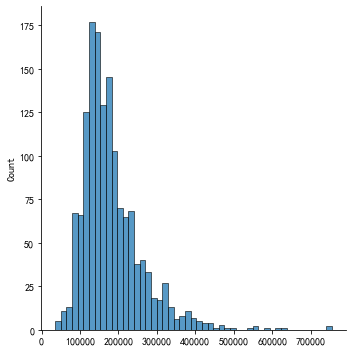

In [200]:
sns.displot(np.expm1(np.log1p(target)))

In [201]:
#离散特征数字化：数据预处理之独热编码（OneHotEncoder）
from sklearn.preprocessing import OneHotEncoder #把离散型的非数值特征数字化，脱离文本内容含义


In [202]:
data[data.columns[data.dtypes == 'object']]#把df（离散型的非数值特征）传入 OneHotEncoder().fit_transform()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Null,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Null,Null,Null,Null,Null,Y,WD,Normal
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Null,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Null,Null,Null,Null,Null,Y,WD,Normal


In [203]:
cat_feature = OneHotEncoder().fit_transform(data[data.columns[data.dtypes == 'object']])

In [204]:
cat_feature.shape

(2919, 258)

In [205]:
cat_feature.dtype

dtype('float64')

In [206]:
cat_feature[0].todense()
#.todense returns a matrix. and toarray returns an ndarray;If you want a matrix, use todense; otherwise, use toarray.


matrix([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.

In [207]:
from sklearn.preprocessing import StandardScaler #把特征进行归一化，将数值特征变成正态分布

In [208]:
num_feature = StandardScaler().fit_transform(data[data.columns[data.dtypes != 'object']])

In [209]:
num_feature.mean(0) #.mean(0) 计算每一列的平均值,.mean(1) 计算每一行的平均值,.mean(A)计算整体的平均值

array([ 3.95557364e-17,  2.40985717e-16,  3.40787883e-17, -1.66742643e-16,
        3.02449246e-16, -5.56214509e-16,  6.81575766e-16,  4.38155849e-17,
       -5.11181824e-17,  7.05917757e-17,  1.30229655e-16,  1.55788746e-16,
       -1.29012556e-16, -2.19077925e-17, -2.19077925e-17,  1.43617751e-16,
        7.85029230e-17, -9.73679665e-18,  7.05917757e-17, -2.55590912e-17,
        2.54373813e-16, -5.24569920e-16,  2.53156713e-16,  5.35523816e-17,
        1.61874244e-16,  1.32663854e-16, -5.90293297e-17, -2.79932904e-17,
       -4.25984854e-17,  6.69404770e-17, -1.21709958e-17,  6.32891782e-17,
        2.43419916e-18,  4.86839833e-18,  1.24144157e-16,  6.49310456e-14])

In [210]:
num_feature.std(0)#.std(0) 计算每一列的标准差,.std(1) 计算每一行的标准差,.std(A)计算整体的标准差

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [211]:
feature = np.concatenate([cat_feature.todense(), num_feature], axis = 1) #特征完成数字化加工

In [212]:
feature #这下特征完全是人类看不懂的语言了，可以召唤sklearn了

matrix([[ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         -1.55218353,  0.15764553],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
         -0.44692486, -0.60296158],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.02675338,  0.15764553],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.02675338, -1.36356868],
        [ 0.        ,  0.        ,  0.        , ...,  1.14431218,
          0.28991426, -1.36356868],
        [ 0.        ,  0.        ,  0.        , ..., -0.08959196,
          1.7635925 , -1.36356868]])

In [213]:
feature.shape

(2919, 294)

In [214]:
test_feature = feature[num_train:]
train_feature = feature[0:num_train]

In [215]:
target #训练集房价：对标签y也做归一化处理

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [216]:
target_log1p = np.log1p(target)

In [217]:
target_log1p

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [218]:
target_log1p.shape

(1460,)

In [219]:
target_log1p.reshape(-1,1)

array([[12.24769912],
       [12.10901644],
       [12.31717117],
       ...,
       [12.49313327],
       [11.86446927],
       [11.90159023]])

In [220]:
target_log1p.shape

(1460,)

In [221]:
scaler = StandardScaler() #实例化，创建实例
scaler.fit(target_log1p.reshape(-1,1)) #调用fit接口，导入标签值

StandardScaler()

In [222]:
target_log1p_scale = scaler.transform(target_log1p.reshape(-1,1))  #对数据各列进行标准化

In [223]:
target_log1p_scale.mean()

-3.989502792050288e-15

In [224]:
target_log1p_scaler.std()#完成标准化

1.0

In [225]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [226]:
model = Ridge()#实例化 

官方文档：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

In [227]:
model.fit(train_feature,target_log1p_scaler)#通过fit向L2模型传入训练特征和归一化的标签

Ridge()

In [228]:
def predict(model, feature):#传入实例化的模型和测试集特征集
    pred = model.predict(feature)#通过predict接口传入特征集，并对测试集进行预测
    pred = scaler.inverse_transform(pred) #X1=scaler.inverse_transform(X_scaled)是将标准化后的数据转换为传入模型前平滑后的数据。
    pred = np.expm1(pred) # np.expm1(pred) 是将平滑后的数据转化为原始分布（log1p的逆运算）
    return pred

In [229]:
train_pred = predict(model,train_feature)#依赖model.fit（）传入正确的参数，完成模型训练，predict里传入待预测的特征

In [230]:
train_pred #得训练集到预测的房价

array([[206382.66082058],
       [198677.95982614],
       [215616.88626543],
       ...,
       [270036.39109799],
       [147023.55154021],
       [141938.58271971]])

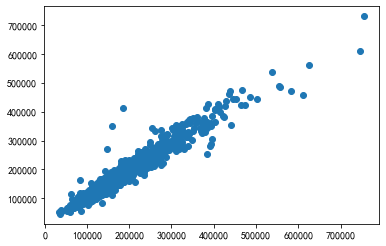

In [231]:
import matplotlib.pyplot as plt
#对比同一组特征下真实Y和预测的y_pred
plt.scatter(target.reshape(-1),train_pred)

In [232]:
from sklearn.metrics import mean_squared_error as mse

In [233]:
np.sqrt(mse(target,train_pred)) ##对MES开方--均方根误差：预估值平均比真实值多了2w

20127.156260527736

In [234]:
test_pred = predict(model,test_feature)

In [235]:
test_pred

array([[117691.8929806 ],
       [147615.27260962],
       [177514.29653278],
       ...,
       [163058.27680056],
       [113278.63508739],
       [219893.71632144]])

In [236]:
sample_submission['SalePrice'] = test_pred.reshape(-1) 

In [237]:
sample_submission.to_csv('submission.csv',index = False)

In [238]:
sample_submission.head()

,Id,SalePrice
0,1461,117691.892981
1,1462,147615.272610
2,1463,177514.296533
3,1464,197428.177930
4,1465,199077.141265
